In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor, MLPClassifier
from google.colab import drive, files

# Carregando dataset
#### https://www.kaggle.com/datasets/shree1992/housedata

In [2]:
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/kaggle/house_data.csv')

dataset.head()

Mounted at /content/drive


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## Pré-processamento

In [4]:
# Transformando sem preços em 0
dataset = dataset[dataset["price"]!=0]

dataset.drop(['street','statezip','country','date','sqft_lot','sqft_above','sqft_basement','yr_renovated'],axis = 1, inplace=True)

<ipython-input-4-0099d1e5d943>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['street','statezip','country','date','sqft_lot','sqft_above','sqft_basement','yr_renovated'],axis = 1, inplace=True)


In [5]:
# Transformando valores não numéricos em valores numéricos
colunas_categoricas = ['city']
label_encoder = LabelEncoder()

for coluna in colunas_categoricas:
    dataset[coluna] = label_encoder.fit_transform(dataset[coluna])

<ipython-input-5-eb6320654c02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[coluna] = label_encoder.fit_transform(dataset[coluna])


In [6]:
# Separando as features e o target
x = dataset.drop(['price'],axis=1)
y = dataset['price']

# Separando dados de treinamento e de teste
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [7]:
x

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,yr_built,city
0,3.0,1.50,1340,1.5,0,0,3,1955,36
1,5.0,2.50,3650,2.0,0,4,5,1921,35
2,3.0,2.00,1930,1.0,0,0,4,1966,18
3,3.0,2.25,2000,1.0,0,0,4,1963,3
4,4.0,2.50,1940,1.0,0,0,4,1976,31
...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,1.0,0,0,4,1954,35
4596,3.0,2.50,1460,2.0,0,0,3,1983,3
4597,3.0,2.50,3010,2.0,0,0,3,2009,32
4598,4.0,2.00,2090,1.0,0,0,3,1974,35


In [8]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4551, dtype: float64

# Modelos

## Regressão Linear

In [10]:
# Criação do modelo de Regressão Linear e realizando treinamento
model = LinearRegression()
model.fit(x_train,y_train)
Y_pred_train = model.predict(x_train)
Y_pred_test = model.predict(x_test)

# Realizando o cálculo de métricas de desempenho
mse_train = np.mean((Y_pred_train - y_train)**2)
mse_test = np.mean((Y_pred_test - y_test)**2)

# Impressão dos Resultados
print("Erro quadrático médio (MSE) - Treino", mse_train)
print("Erro quadrático médio (MSE) - Teste", mse_test)
# print("Raiz do erro quadrático médio (RMSE):", rmse)
# print("R-squared (R²):", r2)

y_test_pre=model.predict(x_test)
test_acc=r2_score(y_test,y_test_pre)
print(f'accuracy = {test_acc*100}%')

Erro quadrático médio (MSE) - Treino 326930956766.63837
Erro quadrático médio (MSE) - Teste 48710428800.92241
accuracy = 57.48966162728952%


## Classificação

In [16]:
# Criação do modelo de Classificação (Regressão Logística) e realizando treinamento
y_train_class = (y_train > np.mean(y_train)).astype(int)
y_test_class = (y_test > np.mean(y_train)).astype(int)
model_lr_clf = LogisticRegression()
model_lr_clf.fit(x_train, y_train_class)
y_pred_lr_clf = model_lr_clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test_class, y_pred_lr_clf))

# Gráfico de barras para comparar classes reais e preditas
# plt.figure(figsize=(8, 5))
# sns.countplot(y_test_class, palette='pastel', label='Valores Reais')
# sns.countplot(y_pred_lr_clf, palette='deep', label='Valores Preditos')
# plt.title('Classificação (Regressão Logística): Valores Reais vs. Preditos')
# plt.legend()
# plt.show()

Accuracy: 0.794289897510981


## Árvores de Decisão

In [17]:
# Criação do modelo de Árvores de Decisão e realizando treinamento
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
 print('Precisão:', accuracy_score(y_test, y_pred_dt))

# Plotando a árvore de decisão (apenas uma visualização simples)
# plt.figure(figsize=(20, 10))
# plot_tree(model_dt, filled=True, feature_names=dataset.columns)
# plt.title('Árvore de Decisão')
# plt.show()

ValueError: continuous is not supported

## Random Forest


In [20]:
# Criação do modelo de Random Forest e realizando treinamento
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print('Precisão:', accuracy_score(y_test, y_pred_rf))

# Gráfico de barras para comparar valores reais e preditos
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, alpha=0.5, color='blue', label='Valores Reais')
plt.bar(range(len(y_test)), y_pred_rf, alpha=0.5, color='red', label='Valores Preditos')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.title('Random Forest: Valores Reais vs. Preditos')
plt.legend()
plt.show()

NameError: name 'y_pred' is not defined

## Aprendizado Não Supervisionado (Clustering com K-means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


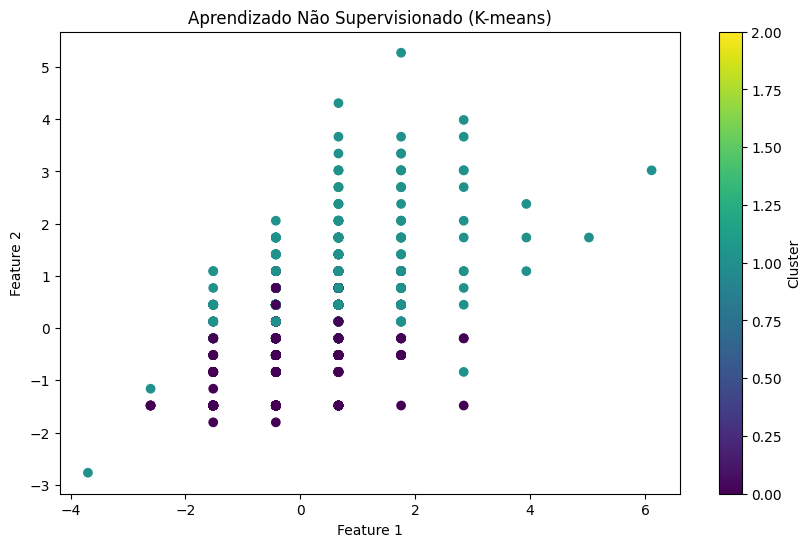

In [19]:
# Criação do modelo KMeans e realizando clusterização
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_train)
clusters = kmeans.predict(x_test)

# Visualizando clusters (exemplo com duas primeiras dimensões)
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 0], x_test[:, 1], c=clusters, cmap='viridis')
plt.title('Aprendizado Não Supervisionado (K-means)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

## Redes Neurais Lineares

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE: 415696194515.868


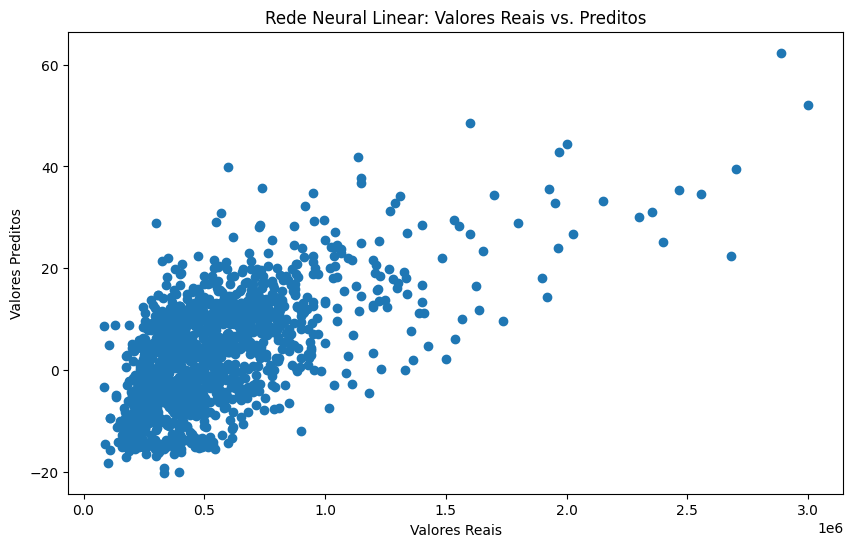

In [ ]:
# Criação do modelo de Redes Neurais Lineares e realizando treinamento
model_nn_linear = MLPRegressor(hidden_layer_sizes=(), random_state=42)
model_nn_linear.fit(x_train, y_train)
y_pred_nn_linear = model_nn_linear.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred_nn_linear))

# Gráfico de dispersão para comparar valores reais e preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn_linear)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Rede Neural Linear: Valores Reais vs. Preditos')
plt.show()

## Redes Neurais com Camada Oculta


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE: 412669273072.36017


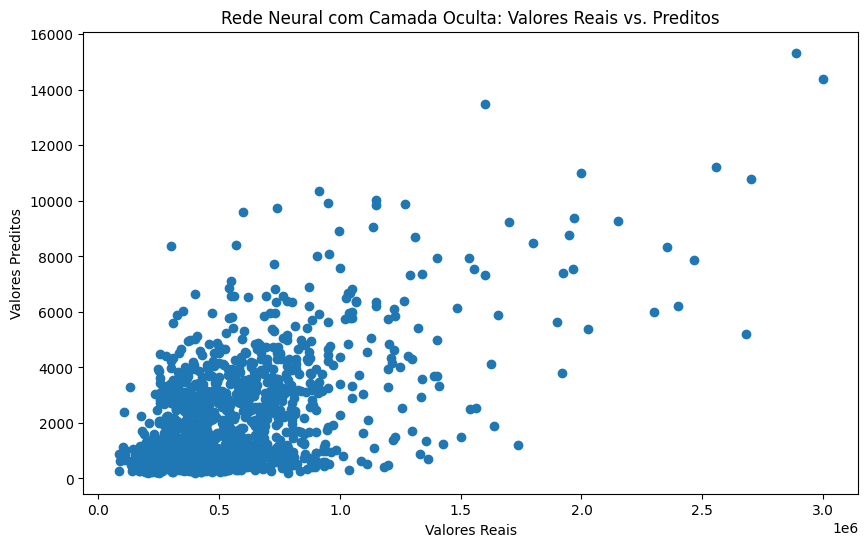

In [ ]:
# Criação do modelo de Redes Neurais Lineares com Camada Oculta e realizando treinamento
model_nn_hidden = MLPRegressor(hidden_layer_sizes=(50,), random_state=42)
model_nn_hidden.fit(x_train, y_train)
y_pred_nn_hidden = model_nn_hidden.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred_nn_hidden))

# Gráfico de dispersão para comparar valores reais e preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn_hidden)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Rede Neural com Camada Oculta: Valores Reais vs. Preditos')
plt.show()